In [43]:
import netCDF4

In [44]:
import numpy as np

In [45]:
import cartopy.crs as ccrs

In [46]:
from netCDF4 import Dataset 

In [47]:
import matplotlib.pyplot as plt

In [48]:
import xarray as xr 

In [49]:
Dataset=(r'/Users/chiaraciscato/Desktop/geomar/FOCI data/CO2flux_baseline_ensemble1_ssp126_1m.nc')

In [50]:
data = xr.open_dataset(Dataset)

In [51]:
lats = data.variables['nav_lat'][:]
lons = data.variables['nav_lon'][:]
time = data.variables['time_counter'][:]
co2flux = data.variables['co2flux_cpl'][:]

In [42]:
data.nav_lat # inspect variable

<xarray.DataArray 'nav_lat' (y: 511, x: 722)>
array([[-77.010475, -77.010475, -77.010475, ..., -77.010475, -77.010475,
        -77.010475],
       [-76.89761 , -76.89761 , -76.89761 , ..., -76.89761 , -76.89761 ,
        -76.89761 ],
       [-76.78378 , -76.78378 , -76.78378 , ..., -76.78378 , -76.78378 ,
        -76.78378 ],
       ...,
       [ 49.988163,  49.988163,  50.064743, ...,  50.064743,  49.988163,
         49.988163],
       [ 49.995502,  49.995502,  50.065956, ...,  50.065956,  49.995502,
         49.995502],
       [ 49.995502,  49.995502,  50.065956, ...,  50.065956,  49.995502,
         49.995502]], dtype=float32)
Coordinates:
    nav_lat  (y, x) float32 -77.01 -77.01 -77.01 -77.01 ... 50.07 50.0 50.0
    nav_lon  (y, x) float32 72.75 73.25 73.75 74.25 ... 73.02 73.01 73.0 73.0
Dimensions without coordinates: y, x
Attributes:
    standard_name:  latitude
    long_name:      Latitude
    units:          degrees_north

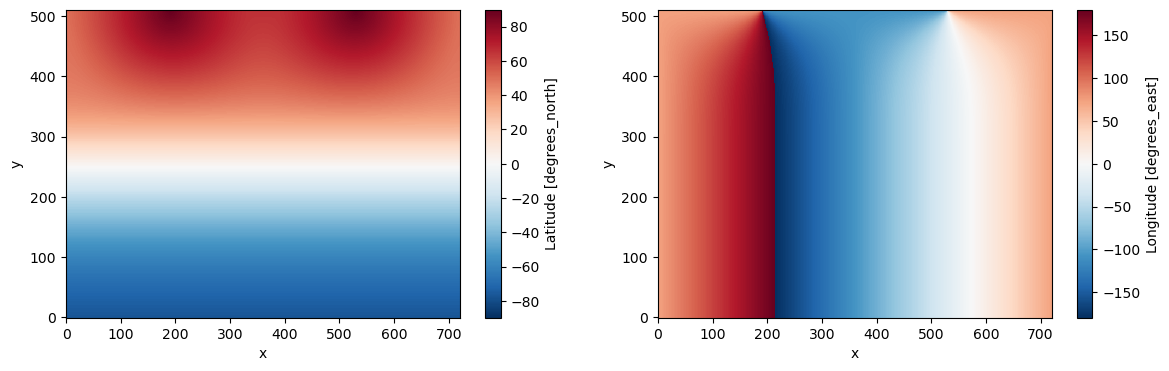

In [52]:
# plot coordinates
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(14, 4))
data.nav_lat.plot(ax=ax1)
data.nav_lon.plot(ax=ax2)

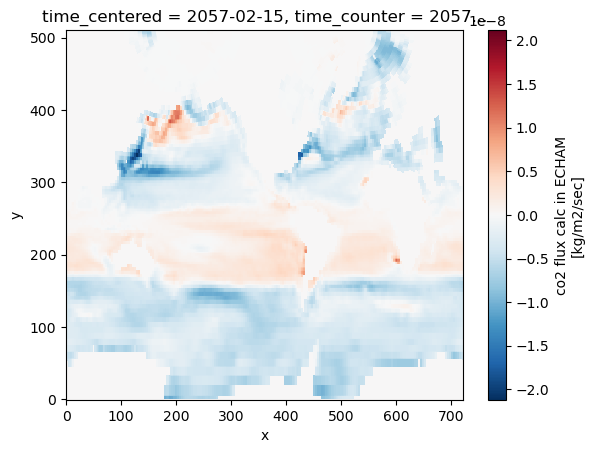

In [53]:
# plot world map at time point [x]
data.co2flux_cpl[505].plot()

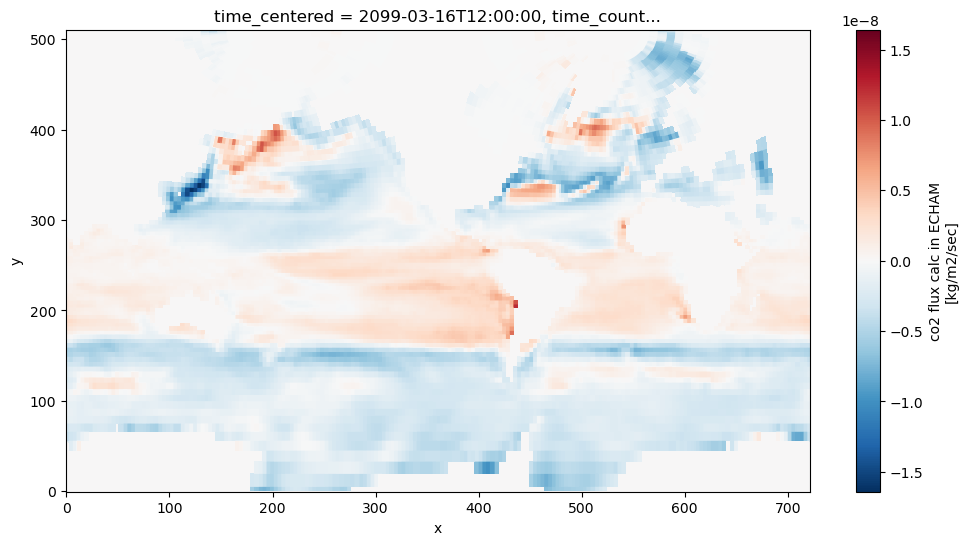

In [25]:
# plot world map with increased figure size
plt.figure(figsize = (12, 6))
data.co2flux_cpl[1010].plot()

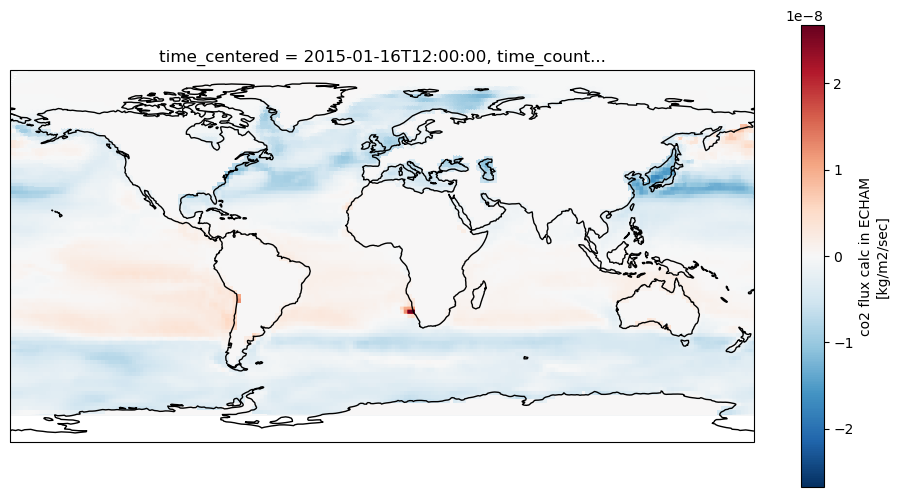

In [39]:
plt.figure(figsize=(12, 6))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_global()
data.co2flux_cpl[0].plot.pcolormesh(
    ax=ax, transform=ccrs.PlateCarree(), x="nav_lon", y="nav_lat", add_colorbar=True
)
ax.coastlines()

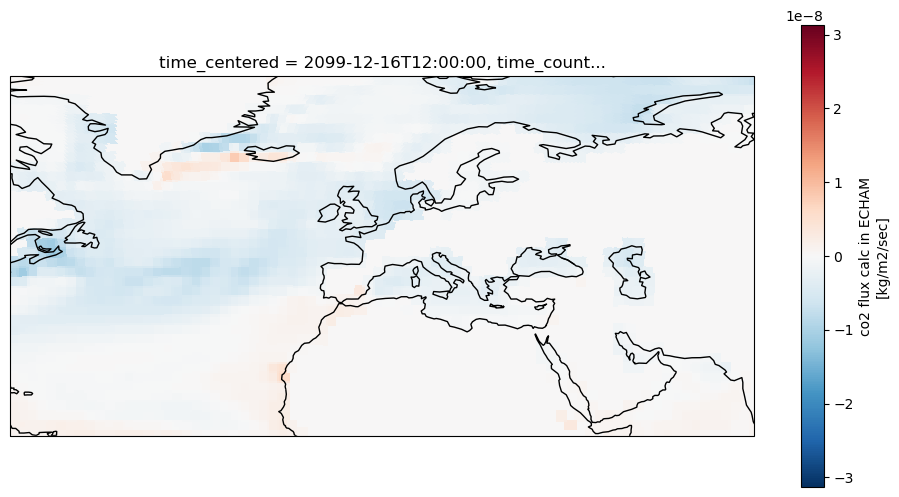

In [41]:
# visualise the data with cartopy
plt.figure(figsize=(12, 6))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_global()
data.co2flux_cpl[1019].plot.pcolormesh( #[] to select a month
    ax=ax, transform=ccrs.PlateCarree(), x="nav_lon", y="nav_lat", add_colorbar=True
)
ax.coastlines()
ax.set_extent([75, -70, 10, 60]) #Plot a region

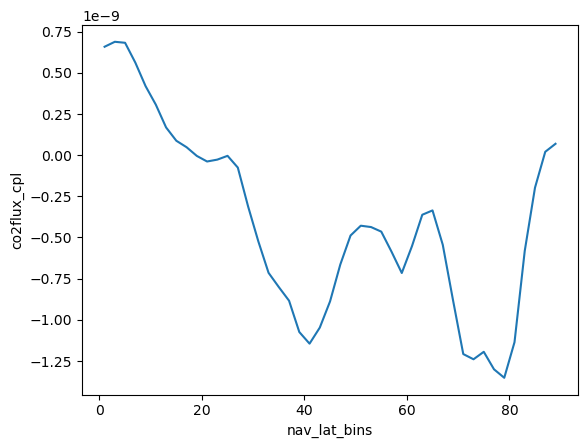

In [29]:
# define two-degree wide latitude bins
lat_bins = np.arange(0, 91, 2)
#Define a label for each bin corresponding to the central latitude
lat_center = np.arange(1, 90, 2)
# group according to those bins and take the mean
CO2flux_mean = data.co2flux_cpl.groupby_bins("nav_lat", lat_bins, labels=lat_center).mean(
    dim=xr.ALL_DIMS
)
# plot the result
CO2flux_mean.plot()

# https://docs.xarray.dev/en/stable/examples/multidimensional-coords.html 

NameError: name 'regionmask' is not defined

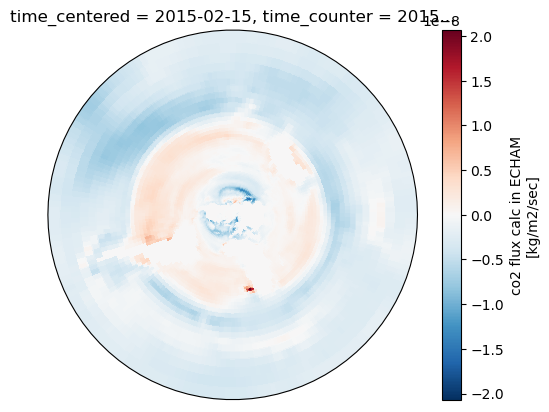

In [55]:
# choose a projection
proj=ccrs.NorthPolarStereo()

ax = plt.subplot(111, projection=proj)
ax.set_global()

data.isel(time_counter=1).co2flux_cpl.plot.pcolormesh(ax=ax, x='nav_lon', y='nav_lat', transform=ccrs.PlateCarree())

# add the abbreviation of the regions
regionmask.defined_regions.srex.plot(ax=ax, regions=[1, 2, 11, 12, 18],
                                     add_ocean=True, coastlines=True, label='abbrev')

ax.set_extent([-180, 180, 50, 90], ccrs.PlateCarree())

ax.coastlines();